**Digital image processing** is the use of computer algorithms to perform image processing on digital images

**aim** of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our AI-Computer Vision models can benefit from this improved data to work on.

The steps to be taken are :
- Read image
- Resize image
- Remove noise(Denoise)
- Segmentation
- Morphology(smoothing edges)

**Note:** The segmentation step is only useful for segmentation problems, if your AI -Computer Vision problem does not include segmentantion, just skip this step.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import os
from google.colab import drive

## 1. Step 1 - Read the image by mounting the drive to this virtual machine

In [0]:
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
image_path = "drive/My Drive/Colab Notebooks/padh.ai.notebooks/9. CNN with PyTorch/2. image_pre_processing_cam_vid/dataset"
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, 'train', file)
                          for file in os.listdir(path + "/train")
                          if file.endswith('.png')])
    return image_files
  
images = loadImages(image_path)
print('Total Images found:',len(images))

Total Images found: 394


## 2. Displayig the image using openCV library

In [0]:
def display_image(image):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.show()

The shape of the numpy array of the image: (360, 480, 3)


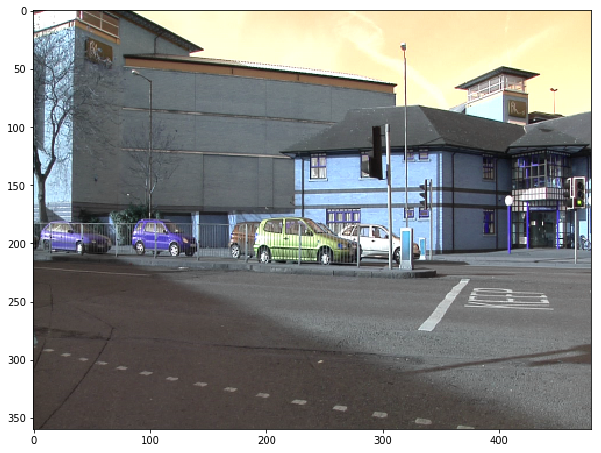

In [0]:
index = np.random.randint(0,len(images))
image = cv2.imread(images[index], cv2.IMREAD_UNCHANGED) # convert it to numpy array
print('The shape of the numpy array of the image:',image.shape)

# display the image
display_image(image)

**Note: ** The cv2.imread() function returns the numpy array of the image in BGR form

## 2. Resize the images

Some images captured by a camera and fed to our AI algorithm vary in size, therefore, we should establish a base size for all images fed into our AI algorithms.

(220, 220, 3)


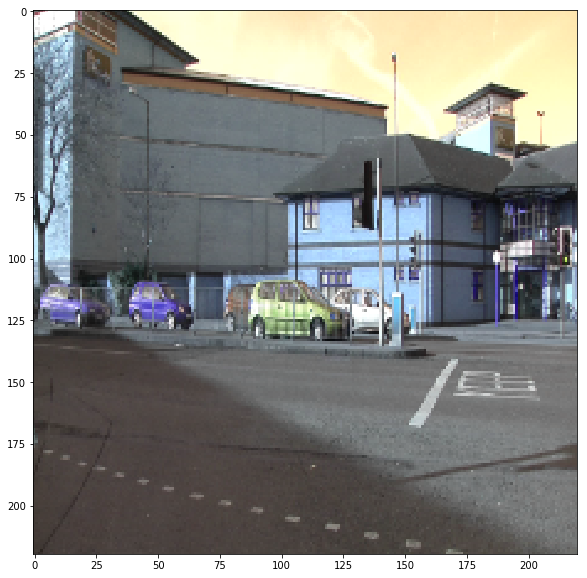

In [0]:
image_resized = cv2.resize(image,(220,220))
print(image_resized.shape)
display_image(image_resized)

## 3. Remove the noise

Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise

Gaussian smoothing is also used as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales.

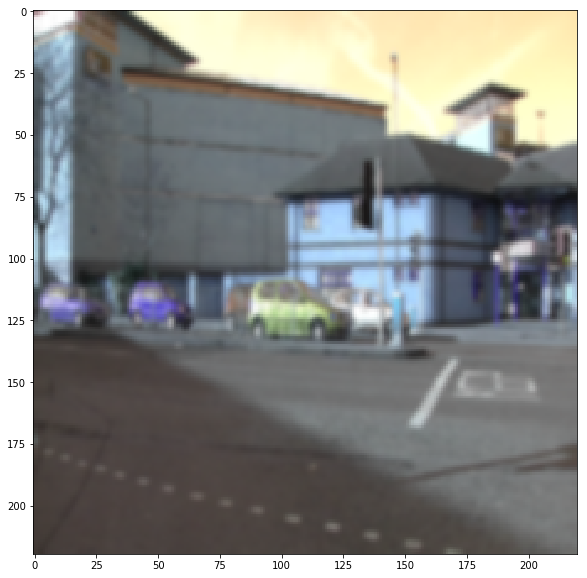

In [0]:
image_blur = cv2.GaussianBlur(image_resized, (5,5), 0)
display_image(image_blur)

## 4. Segmentation and Morphology

we step we are going to segment the image, separating background from foreground objects and we are going to further improve our segmentation with more noise removal.

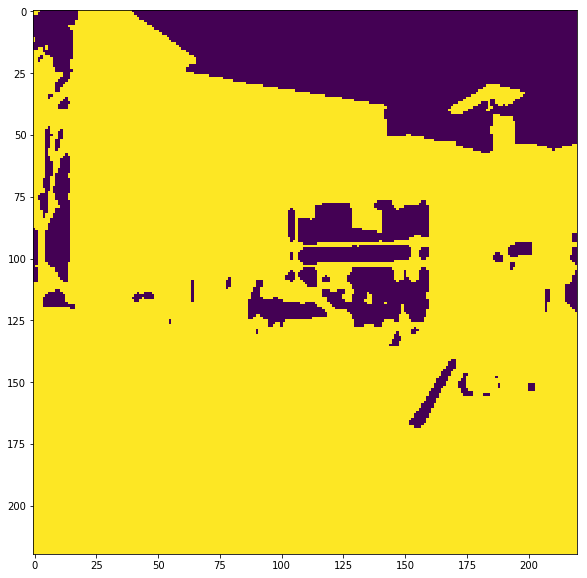

In [0]:
image_gray = cv2.cvtColor(image_blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_image(thresh)

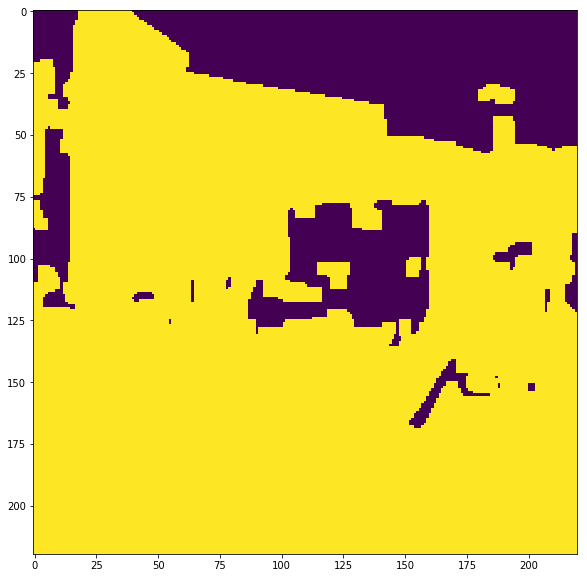

In [0]:
# further noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display_image(opening)

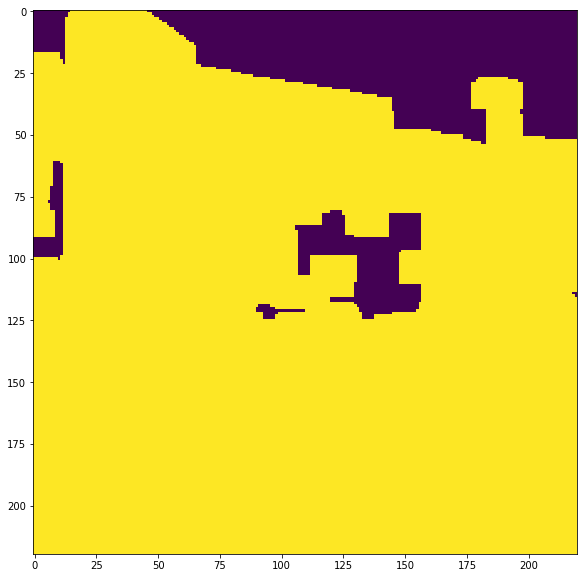

In [0]:
# displaying the sure background area
sure_bg = cv2.dilate(opening, kernel,iterations=3)
display_image(sure_bg)

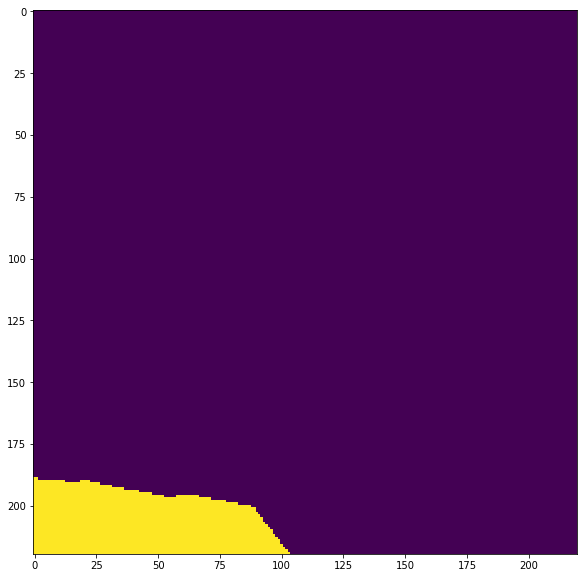

In [0]:
# find the sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
display_image(sure_fg)

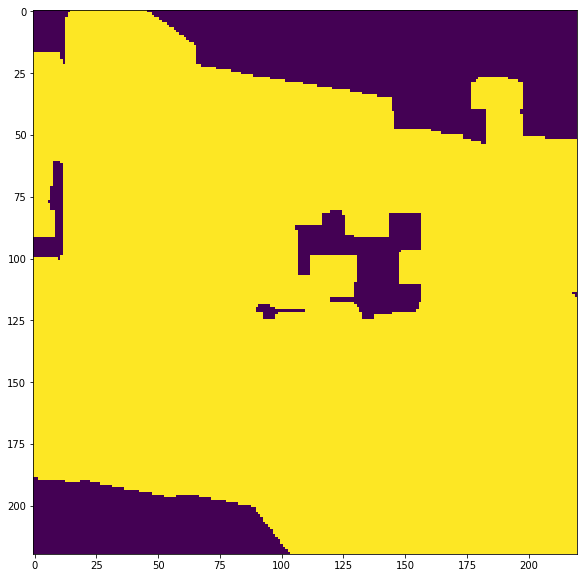

In [0]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display_image(unknown)